In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar os dados de treino

train_file_path = './train.csv'
df = pd.read_csv(train_file_path)
feats = [
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',
    'NU_IDADE', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LINGUA',
    'TP_ESCOLA', 'TP_ENSINO', 'TP_ST_CONCLUSAO',
    'IN_TREINEIRO', 'TP_STATUS_REDACAO'
]
replaced_values = [
    0, 0, 0, 0,
    None, 2, None,
    None, 1, None,
    None, 2,
    0
]

target = 'NU_NOTA_MT'

for f, r in zip(feats + [target], replaced_values):
    if r is None: continue
    df[f] = df[f].fillna(r)


df

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,4582,aadf671ef8c1c6efa42e69432093ab83c17a52ac,2016,3502903,Araçoiaba da Serra,35,SP,20,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A
13726,4583,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,2016,2613800,São Vicente Ferrer,26,PE,33,F,0.0,...,NaN,A,A,B,B,A,A,A,A,A
13727,4584,5354503700ecf2388f68990435390b6e1ad454ee,2016,4322186,Tupanci do Sul,43,RS,15,F,0.0,...,NaN,A,A,A,A,C,A,A,A,A
13728,4585,c7a9e94a42bd76b7978f13c013a61702e36cc42c,2016,3303203,Nilópolis,33,RJ,36,M,1.0,...,5.0,A,A,A,A,D,A,A,A,D


In [2]:
X = df[feats].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)

display(X.shape)
display(X, y)

(13730, 12)

array([[436.3, 495.4, 581.2, ...,   1. ,   0. ,   1. ],
       [474.5, 544.1, 599. , ...,   2. ,   0. ,   1. ],
       [  0. ,   0. ,   0. , ...,   3. ,   0. ,   2. ],
       ...,
       [460.5, 528.9, 569.3, ...,   3. ,   1. ,   1. ],
       [422.5, 621.7, 569. , ...,   4. ,   0. ,   1. ],
       [488.7, 575.3, 565.9, ...,   2. ,   0. ,   1. ]])

array([399.4, 459.8,   0. , ..., 398. , 386.6, 428.9])

In [3]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

svr = SVR(C=5000, epsilon=0.1, tol=1e-5, kernel='rbf')
svr.fit(X_train, y_train)
out = svr.predict(X_test)

mse = mean_squared_error(y_test, out)
print('Erro quadrático médio:',mse)

Erro quadrático médio: 3882.1109063368767


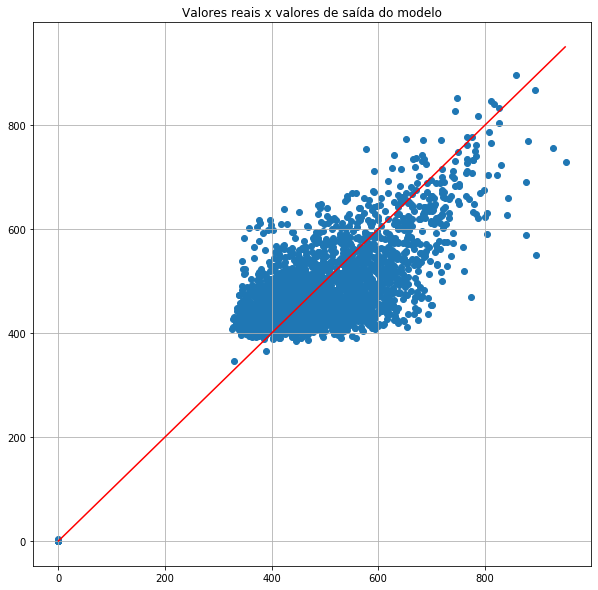

In [4]:
import matplotlib.pyplot as plt
# Visualização do classificador sob os dados de teste
fig, ax = plt.subplots(1,1, figsize=(10, 10))
sample = np.random.permutation(len(y_test))
plt.scatter(y_test[sample], out[sample])
x = np.arange(max(y_test[sample].max(), out[sample].max()))
plt.plot(x,x, color='red')
plt.title(f'Valores reais x valores de saída do modelo')
plt.grid()

In [5]:
# Carregar base de dados do teste final

test_file_path = './test.csv'
df = pd.read_csv(test_file_path)

# Substituição de dados nulos
for f, r in zip(feats, replaced_values):
    if r is None: continue
    df[f] = df[f].fillna(r)


In [6]:
# Treinar de novo agora com todos os dados de entrada
svr.fit(X, y)

X_answer = df[feats].values

y_answer = svr.predict(X_answer)
df_answer = pd.DataFrame(zip(df['NU_INSCRICAO'].values, pd.Series(y_answer)), columns=['NU_INSCRICAO', 'NU_NOTA_MT'])
df_answer.to_csv('answer.csv', index=False)
